<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part5_timeseries_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 4.2MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=2bfbad52584a02279607bac921742edea6993bc675234b79bcf6d5984fe31406
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [77]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(14,8))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=4, label='Susceptible')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=4, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=4, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [4]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [5]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [6]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [7]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [8]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [9]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [10]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [11]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], axis=1)
data.columns = range(data.shape[1])
#data[[1,4]] = data[[1,4]].apply(lambda x: x*10000)
data.head()

,0,1,2,3,4,5
0,202.845900,-6.153317e-11,797.154100,202.845900,-6.064853e-11,797.154100
1,202.846874,1.427388e-03,797.151699,202.846529,9.215979e-04,797.152550
2,202.845900,-1.142372e-10,797.154100,202.845900,-8.729939e-11,797.154100
3,202.845905,7.490886e-06,797.154088,202.845903,4.836417e-06,797.154092
4,202.845903,4.836417e-06,797.154092,202.845902,3.122493e-06,797.154095


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
unscaled_data = scaler.inverse_transform(data_scaled)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5
0,5.936918e-13,2.693016e-12,1.000000,6.065703e-13,2.698917e-12,1.000000
1,1.223859e-06,9.273176e-06,0.999997,7.901911e-07,5.987256e-06,0.999998
2,5.484502e-13,2.350619e-12,1.000000,5.837553e-13,2.525777e-12,1.000000
3,6.423390e-09,4.866840e-08,1.000000,4.147457e-09,3.142336e-08,1.000000
4,4.147428e-09,3.142337e-08,1.000000,2.677919e-09,2.028868e-08,1.000000


In [14]:
X = data_scaled[[0,1,2]]
y = data_scaled[[3,4,5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)




Epoch 00001: val_accuracy improved from -inf to 0.98875, saving model to weights-improvement-01-0.99.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy did not improve from 0.98875

Epoch 00003: val_accuracy did not improve from 0.98875

Epoch 00004: val_accuracy did not improve from 0.98875

Epoch 00005: val_accuracy did not improve from 0.98875

Epoch 00006: val_accuracy did not improve from 0.98875

Epoch 00007: val_accuracy did not improve from 0.98875

Epoch 00008: val_accuracy did not improve from 0.98875

Epoch 00009: val_accuracy did not improve from 0.98875

Epoch 00010: val_accuracy improved from 0.98875 to 0.99187, saving model to weights-improvement-10-0.99.hdf5

Epoch 00011: val_accuracy did not improve from 0.99187

Epoch 00012: val_accuracy did not improve from 0.99187

Epoch 00013: val_accuracy did not improve from 0.99187

Epoch 00014: val_accuracy did not improve from 0.99187

Epoch 00015: val_accuracy improved from 0.99187 to 0.99250, saving model to weights-improvement-15-0.99.hdf5

Epoch 00016: val_accuracy did not improve from 0.99250

Epoch 00017: val_accuracy did not improve from 0.99

In [18]:
predicted_y = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_y)

0.000858392123900982

In [20]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 21us/step
Accuracy: 98.10


In [21]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [22]:
y_test.head()

,3,4,5
6252,6.301174e-09,4.774265e-08,1.000000
4684,2.443601e-13,3.917094e-13,1.000000
1731,7.203204e-01,6.339488e-01,0.158172
4742,1.354614e-05,1.026344e-04,0.999967
4521,2.323993e-08,1.760871e-07,1.000000


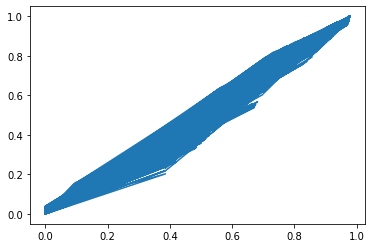

In [23]:
#plot of S_pred1 vs s_actual1                
#pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
plt.figure(figsize=(6,4))
plt.plot(df_7[0],y_train[3])                                   

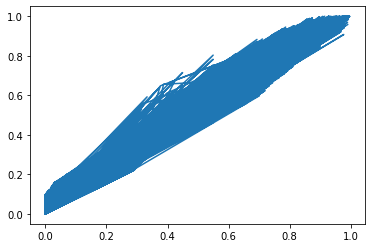

In [ ]:
#plot of I_pred1 vs I_actual1
plt.figure(figsize=(6,4))
plt.plot(df_7[1],y_train[4])    

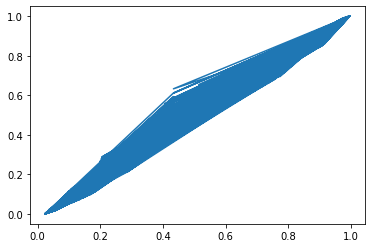

In [24]:
plt.figure(figsize=(6,4))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

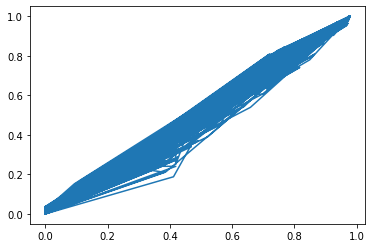

In [25]:
#plot of S_pred2 vs S_actual2
#pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)
plt.figure(figsize=(6,4))
plt.plot(df_8[0],y_test[3])    

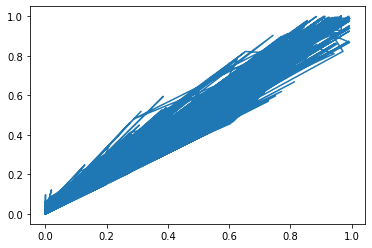

In [26]:
plt.figure(figsize=(6,4))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

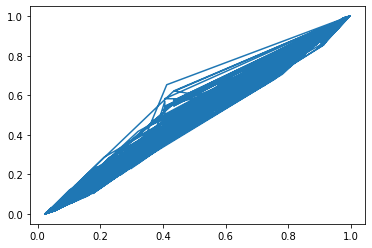

In [27]:
plt.figure(figsize=(6,4))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2

In [34]:
comp_data = pd.DataFrame()   

In [35]:
k = 0
for i in range(100):
  comp_data[k] = S_value[i]
  comp_data[k+1] = I_value[i]
  comp_data[k+2] = R_value[i]
  k = k+3

In [36]:
#original data obtained from solving differential eqn
#columns are in S, I, R order for day  2,3, ......100.


comp_data = comp_data.iloc[:, 3:300] 
comp_data.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,996.831741,2.081865,1.086394,992.343340,4.313849,3.342811,983.151515,8.852717,7.995767,964.734189,17.814727,17.451084,929.387058,34.498198,36.114743,866.773847,62.237813,70.988339,769.868724,99.863893,130.267383,646.360107,135.940897,217.698996,520.725305,153.508635,325.766060,416.503150,146.066471,437.430379,341.525694,121.808373,536.665932,291.632900,92.737627,615.629472,259.527774,66.526707,673.945519,239.080167,...,797.154100,202.845900,-1.950505e-10,797.154100,202.845900,-1.681128e-10,797.154100,202.845900,-1.411750e-10,797.154100,202.845900,-1.142372e-10,797.154100,202.845900,-8.729939e-11,797.154100,202.845900,-6.153317e-11,797.154100,202.845900,-6.064853e-11,797.154100,202.845900,-5.976389e-11,797.154100,202.845900,-5.887924e-11,797.154100,202.845900,-5.799460e-11,797.154100,202.845900,-5.710996e-11,797.154100,202.845900,-5.622532e-11,797.154100,202.845900,-5.534068e-11,797.154100
1,998.652433,1.173579,0.173988,998.244715,1.377122,0.378164,997.766529,1.615737,0.617734,997.205827,1.895381,0.898792,996.548546,2.222992,1.228462,995.778296,2.606634,1.615070,994.875996,3.055666,2.068338,993.819468,3.580927,2.599605,992.582980,4.194939,3.222081,991.136742,4.912123,3.951135,989.446352,5.749032,4.804616,987.472200,6.724583,5.803217,985.168840,7.860290,6.970871,982.484349,...,786.285081,206.897011,5.836171e+00,787.266818,206.527568,5.311996e+00,788.160436,206.191898,4.834354e+00,788.973748,205.886901,4.399208e+00,789.713891,205.609762,4.002856e+00,790.387382,205.357927,3.641906e+00,791.000167,205.129077,3.313248e+00,791.557674,204.921109,3.014039e+00,792.064852,204.732111,2.741675e+00,792.526214,204.560348,2.493780e+00,792.945873,204.404244,2.268179e+00,793.327577,204.262370,2.062889e+00,793.674742,204.133424,1.876098e+00,793.990478
2,998.499392,1.249991,0.250617,997.874067,1.562085,0.563848,997.093286,1.951491,0.955223,996.118916,2.437017,1.444067,994.903759,3.041856,2.054386,993.389553,3.794501,2.815946,991.504632,4.729788,3.765580,989.161216,5.890058,4.948726,986.252377,7.326375,6.421248,982.648752,9.099726,8.251523,978.195192,11.282035,10.522773,972.707660,13.956743,13.335597,965.970906,17.218562,16.810531,957.737679,...,796.722413,202.999294,2.245687e-01,796.776137,202.980197,1.966261e-01,796.823177,202.963478,1.721591e-01,796.864363,202.948840,1.507355e-01,796.900425,202.936025,1.319770e-01,796.931998,202.924805,1.155524e-01,796.959643,202.914982,1.011713e-01,796.983847,202.906382,8.857972e-02,797.005038,202.898852,7.755495e-02,797.023593,202.892260,6.790212e-02,797.039837,202.886489,5.945056e-02,797.054060,202.881436,5.205082e-02,797.066513,202.877012,4.557201e-02,797.077416
3,998.577798,1.210845,0.211357,998.066860,1.465885,0.467255,997.448721,1.774260,0.777020,996.701154,2.146946,1.151899,995.797452,2.597096,1.605452,994.705574,3.140431,2.153995,993.387168,3.795685,2.817146,991.796451,4.585108,3.618442,989.878937,5.534999,4.586065,987.570044,6.676279,5.753677,984.793588,8.045055,7.161358,981.460214,9.683135,8.856651,977.465877,11.638425,10.895698,972.690480,...,794.951346,203.644974,1.166715e+00,795.188311,203.558849,1.041337e+00,795.399814,203.482011,9.294026e-01,795.588586,203.413458,8.294774e-01,795.757064,203.352296,7.402773e-01,795.907427,203.297727,6.606549e-01,796.041618,203.249040,5.895848e-01,796.161375,203.205601,5.261508e-01,796.268248,203.166844,4.695343e-01,796.363622,203.132264,4.190042e-01,796.448732,203.101410,3.739073e-01,796.524683,203.073881,3.336604e-01,796.592458,203.049319,2.977427e-01,796.652939
4,996.458261,2.267976,1.273763,990.736046,5.110638,4.153315,978.053080,11.351502,10.595418,950.885321,24.434023,24.680655,896.686775,49.289141,54.024084,802.206094,88.099293,109.694613,669.623167,130.357000,200.019832,528.208869,1

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled_comp = scaler.fit_transform(comp_data)
unscaled_data_comp = scaler.inverse_transform(data_scaled_comp)
data_scaled_comp = pd.DataFrame(data_scaled_comp)
unscaled_data_comp = pd.DataFrame(unscaled_data_comp)
data_scaled_comp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296
0,0.365939,0.634460,0.633663,0.469786,0.531811,0.528640,0.562183,0.442530,0.433284,0.630521,0.381921,0.358234,0.662171,0.369907,0.312678,0.644410,0.440337,0.304960,0.571418,0.646454,0.340103,0.456596,0.882392,0.415202,0.331840,0.997267,0.516838,0.225872,0.948600,0.625260,0.148678,0.789953,0.723706,0.096684,0.599833,0.803784,0.062733,0.428412,0.864321,0.040742,...,1.000000,3.658185e-13,1.826187e-12,1.000000,4.011791e-13,1.994079e-12,1.000000,4.347633e-13,2.173907e-12,1.000000,4.685141e-13,2.351410e-12,1.000000,5.022649e-13,2.525855e-12,1.000000,5.354051e-13,2.696745e-12,1.000000,5.476175e-13,2.698519e-12,1.000000,5.587197e-13,2.705162e-12,1.000000,5.683787e-13,2.711234e-12,1.000000,5.815903e-13,2.716239e-12,1.000000,5.895839e-13,2.723701e-12,1.000000,6.041279e-13,2.727721e-12,1.000000,6.119549e-13,2.733197e-12,1.000000
1,0.899112,0.101044,0.100733,0.940272,0.060087,0.059375,0.966159,0.034461,0.033245,0.980779,0.020206,0.018331,0.988175,0.013424,0.010572,0.991384,0.011488,0.006900,0.992326,0.013373,0.005372,0.992054,0.016798,0.004935,0.991073,0.020804,0.005090,0.989590,0.025484,0.005626,0.987673,0.030947,0.006457,0.985325,0.037318,0.007553,0.982519,0.044735,0.008915,0.979205,...,0.986363,5.090164e-03,3.792904e-02,0.987595,4.625984e-03,3.451427e-02,0.988716,4.204236e-03,3.140700e-02,0.989736,3.821025e-03,2.858839e-02,0.990665,3.472814e-03,2.600712e-02,0.991510,3.156396e-03,2.369450e-02,0.992279,2.868856e-03,2.152812e-02,0.992978,2.607551e-03,1.958604e-02,0.993614,2.370081e-03,1.782260e-02,0.994193,2.154265e-03,1.620122e-02,0.994720,1.958124e-03,1.474517e-02,0.995199,1.779860e-03,1.340179e-02,0.995634,1.617842e-03,1.218855e-02,0.996031
2,0.854295,0.145919,0.145492,0.910722,0.089797,0.088766,0.947550,0.053393,0.051544,0.969055,0.032513,0.029528,0.980191,0.022468,0.017724,0.984959,0.020031,0.012059,0.986019,0.024321,0.009804,0.984876,0.031899,0.009415,0.982229,0.041282,0.010166,0.978309,0.052870,0.011773,0.973104,0.067132,0.014168,0.966470,0.084615,0.017388,0.958185,0.105938,0.021534,0.947965,...,0.999458,1.927380e-04,1.459463e-03,0.999526,1.687435e-04,1.277563e-03,0.999585,1.477364e-04,1.118454e-03,0.999636,1.293447e-04,9.795592e-04,0.999682,1.132427e-04,8.574734e-04,0.999721,9.914542e-05,7.517920e-04,0.999756,8.680314e-05,6.573696e-04,0.999786,7.599738e-05,5.756151e-04,0.999813,6.653684e-05,5.041555e-04,0.999836,5.825404e-05,4.411365e-04,0.999857,5.100236e-05,3.864813e-04,0.999874,4.465341e-05,3.381541e-04,0.999890,3.909482e-05,2.960703e-04,0.999904
3,0.877255,0.122930,0.122561,0.926092,0.074345,0.073477,0.957374,0.043400,0.041882,0.975335,0.025922,0.023529,0.984529,0.017556,0.013836,0.988499,0.015327,0.009215,0.989541,0.018212,0.007328,0.988937,0.023365,0.006878,0.987296,0.029567,0.007254,0.984850,0.037021,0.008203,0.981648,0.045963,0.009635,0.977647,0.056666,0.011540,0.972755,0.069444,0.013948,0.966842,...,0.997236,1.004026e-03,7.582435e-03,0.997534,8.958147e-04,6.766002e-03,0.997799,7.992721e-04,6.037984e-03,0.998036,7.131385e-04,5.390385e-03,0.998247,6.362908e-04,4.809685e-03,0.998436,5.677271e-04,4.298267e-03,0.998604,5.065538e-04,3.830878e-03,0.998754,4.519738e-04,3.419071e-03,0.998889,4.032762e-04,3.052266e-03,0.999008,3.598266e-04,2.722125e-03,0.999115,3.210593e-04,2.430729e-03,0.999210,2.864695e-04,2.167663e-03,0.999295,2.556068e-04,1.934362e-03,0.999371
4,0.256569,0.743759,0.743104,0.341645,0.659799,0.656932,0.421257,0.583428,0.574238,0.481140,0.532323,0.506693,0.503444,0.533275,0.467768,0.470747,0.626324,0.471260,0.383895,0.845865,0.522229,0.274516,0.994997,0.607714,0.179549,0.942109,0.703168,0.112787,0.757817,0.788588,0.070130,0.547242,0.855558,0.043664,0.369184,0.904039,0.027277,0.238429,0.937452,0.017077,...,1.000000,5.937473e-13,2.723737e-12,1.00

In [38]:
pred_data = {}
pred_data["group0"] = data_scaled_comp[[0,1,2]]

In [39]:
# Predicted data 
for i in range(98):
  pred_data["group" + str(i+1)] = pd.DataFrame(model.predict(pred_data["group" + str(i)]))

In [40]:
 predicted_data = pd.DataFrame()
 for i in range(98):
   predicted_data = pd.concat([predicted_data,pred_data["group" + str(i+1)]],axis = 1)

In [41]:
predicted_data.head()

,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,...,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2
0,0.167594,0.807948,0.682380,0.101685,0.690230,0.768876,0.089713,0.524015,0.810415,0.064958,0.353608,0.865405,0.030672,0.273479,0.913771,0.000000,0.213209,0.926276,0.000000,0.147844,0.939839,0.000000,0.086444,0.952579,0.000000,0.028769,0.964546,0.000000,0.000000,0.980623,0.000000,0.000000,0.993131,0.000000,0.000000,0.994506,0.000000,0.000000,0.994658,0.000000,...,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676
1,0.888023,0.217855,0.080793,0.848971,0.313334,0.101746,0.780970,0.467146,0.141232,0.698212,0.654331,0.189286,0.628928,0.782318,0.234392,0.542621,0.868208,0.303059,0.485440,0.913413,0.350537,0.442650,0.947242,0.386067,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,...,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682
2,0.840715,0.332009,0.106541,0.768881,0.494487,0.148252,0.689236,0.674635,0.194499,0.611770,0.802369,0.247537,0.530974,0.877416,0.312729,0.477947,0.919337,0.356759,0.434675,0.953546,0.392689,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,...,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682
3,0.865916,0.271922,0.092651,0.806704,0.408937,0.126289,0.719086,0.607117,0.177166,0.658703,0.743696,0.212228,0.563191,0.851946,0.285978,0.498673,0.902951,0.339549,0.456735,0.936106,0.374372,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,...,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682,0.419026,0.965918,0.405682
4,0.096487,0.680945,0.775699,0.089195,0.502846,0.814704,0.059068,0.339843,0.873714,0.030672,0.273479,0.913771,0.000000,0.213209,0.926276,0.000000,0.147844,0.939839,0.000000,0.086444,0.952579,0.000000,0.028769,0.964546,0.000000,0.000000,0.980623,0.000000,0.000000,0.993131,0.000000,0.000000,0.994506,0.000000,0.000000,0.994658,0.000000,0.000000,0.994674,0.000000,...,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676,0.000000,0.000000,0.994676


In [42]:
original_data = data_scaled_comp.iloc[:,3:297]

In [43]:
"""we have to compare between original data and predicted data, 
which are data from day 3 to day 100 in S,I,R order"""

original_data.head()   

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296
0,0.469786,0.531811,0.528640,0.562183,0.442530,0.433284,0.630521,0.381921,0.358234,0.662171,0.369907,0.312678,0.644410,0.440337,0.304960,0.571418,0.646454,0.340103,0.456596,0.882392,0.415202,0.331840,0.997267,0.516838,0.225872,0.948600,0.625260,0.148678,0.789953,0.723706,0.096684,0.599833,0.803784,0.062733,0.428412,0.864321,0.040742,0.293783,0.907921,0.026494,...,1.000000,3.658185e-13,1.826187e-12,1.000000,4.011791e-13,1.994079e-12,1.000000,4.347633e-13,2.173907e-12,1.000000,4.685141e-13,2.351410e-12,1.000000,5.022649e-13,2.525855e-12,1.000000,5.354051e-13,2.696745e-12,1.000000,5.476175e-13,2.698519e-12,1.000000,5.587197e-13,2.705162e-12,1.000000,5.683787e-13,2.711234e-12,1.000000,5.815903e-13,2.716239e-12,1.000000,5.895839e-13,2.723701e-12,1.000000,6.041279e-13,2.727721e-12,1.000000,6.119549e-13,2.733197e-12,1.000000
1,0.940272,0.060087,0.059375,0.966159,0.034461,0.033245,0.980779,0.020206,0.018331,0.988175,0.013424,0.010572,0.991384,0.011488,0.006900,0.992326,0.013373,0.005372,0.992054,0.016798,0.004935,0.991073,0.020804,0.005090,0.989590,0.025484,0.005626,0.987673,0.030947,0.006457,0.985325,0.037318,0.007553,0.982519,0.044735,0.008915,0.979205,0.053360,0.010557,0.975320,...,0.986363,5.090164e-03,3.792904e-02,0.987595,4.625984e-03,3.451427e-02,0.988716,4.204236e-03,3.140700e-02,0.989736,3.821025e-03,2.858839e-02,0.990665,3.472814e-03,2.600712e-02,0.991510,3.156396e-03,2.369450e-02,0.992279,2.868856e-03,2.152812e-02,0.992978,2.607551e-03,1.958604e-02,0.993614,2.370081e-03,1.782260e-02,0.994193,2.154265e-03,1.620122e-02,0.994720,1.958124e-03,1.474517e-02,0.995199,1.779860e-03,1.340179e-02,0.995634,1.617842e-03,1.218855e-02,0.996031
2,0.910722,0.089797,0.088766,0.947550,0.053393,0.051544,0.969055,0.032513,0.029528,0.980191,0.022468,0.017724,0.984959,0.020031,0.012059,0.986019,0.024321,0.009804,0.984876,0.031899,0.009415,0.982229,0.041282,0.010166,0.978309,0.052870,0.011773,0.973104,0.067132,0.014168,0.966470,0.084615,0.017388,0.958185,0.105938,0.021534,0.947965,0.131785,0.026755,0.935481,...,0.999458,1.927380e-04,1.459463e-03,0.999526,1.687435e-04,1.277563e-03,0.999585,1.477364e-04,1.118454e-03,0.999636,1.293447e-04,9.795592e-04,0.999682,1.132427e-04,8.574734e-04,0.999721,9.914542e-05,7.517920e-04,0.999756,8.680314e-05,6.573696e-04,0.999786,7.599738e-05,5.756151e-04,0.999813,6.653684e-05,5.041555e-04,0.999836,5.825404e-05,4.411365e-04,0.999857,5.100236e-05,3.864813e-04,0.999874,4.465341e-05,3.381541e-04,0.999890,3.909482e-05,2.960703e-04,0.999904
3,0.926092,0.074345,0.073477,0.957374,0.043400,0.041882,0.975335,0.025922,0.023529,0.984529,0.017556,0.013836,0.988499,0.015327,0.009215,0.989541,0.018212,0.007328,0.988937,0.023365,0.006878,0.987296,0.029567,0.007254,0.984850,0.037021,0.008203,0.981648,0.045963,0.009635,0.977647,0.056666,0.011540,0.972755,0.069444,0.013948,0.966842,0.084652,0.016919,0.959748,...,0.997236,1.004026e-03,7.582435e-03,0.997534,8.958147e-04,6.766002e-03,0.997799,7.992721e-04,6.037984e-03,0.998036,7.131385e-04,5.390385e-03,0.998247,6.362908e-04,4.809685e-03,0.998436,5.677271e-04,4.298267e-03,0.998604,5.065538e-04,3.830878e-03,0.998754,4.519738e-04,3.419071e-03,0.998889,4.032762e-04,3.052266e-03,0.999008,3.598266e-04,2.722125e-03,0.999115,3.210593e-04,2.430729e-03,0.999210,2.864695e-04,2.167663e-03,0.999295,2.556068e-04,1.934362e-03,0.999371
4,0.341645,0.659799,0.656932,0.421257,0.583428,0.574238,0.481140,0.532323,0.506693,0.503444,0.533275,0.467768,0.470747,0.626324,0.471260,0.383895,0.845865,0.522229,0.274516,0.994997,0.607714,0.179549,0.942109,0.703168,0.112787,0.757817,0.788588,0.070130,0.547242,0.855558,0.043664,0.369184,0.904039,0.027277,0.238429,0.937452,0.017077,0.149370,0.959768,0.010699,...,1.000000,5.937473e-13,2.723737e-12,1

In [55]:
orig_S = []
for i in range(1,99):
  orig_S.append(original_data.iloc[0][3*i])

orig_I = []
for i in range(98):
  orig_I.append(original_data.iloc[0][3*i + 4])

orig_R = []
for i in range(98):
  orig_R.append(original_data.iloc[0][3*i + 5])



In [44]:
t = np.linspace(0, 97, 98) # Grid of time points (in days)

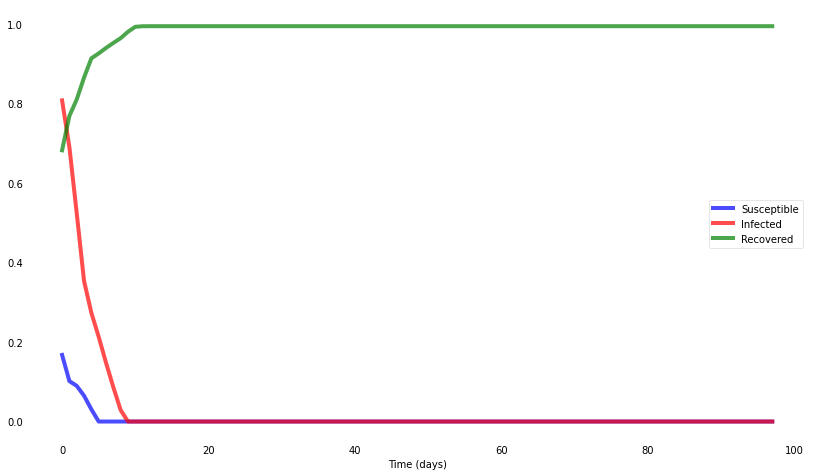

In [78]:
plotsir(t,predicted_data[0].iloc[0] , predicted_data[1].iloc[0], predicted_data[2].iloc[0])


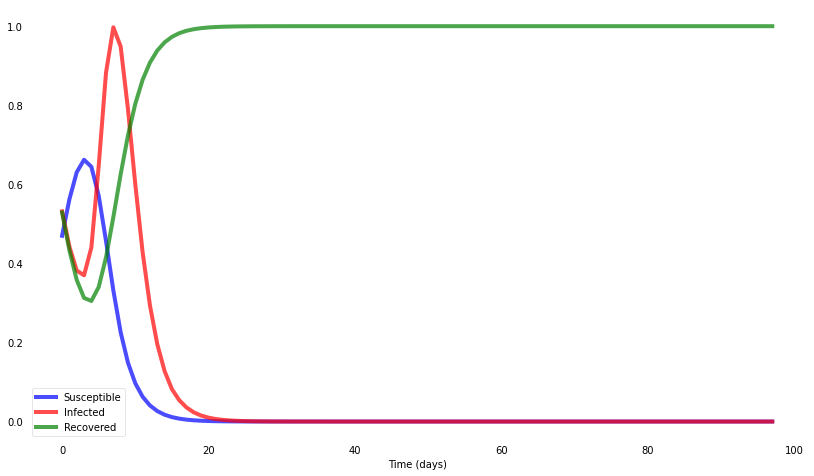

In [79]:
plotsir(t,orig_S , orig_I, orig_R)